In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

from utils.helper import load_and_summarize, scale_dataframe,split_data

In [2]:
df_housing = load_and_summarize('CSV Files/processed_housing_data.csv')

--- Loading processed_housing_data.csv ---
First 5 rows:
      price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  1.000000  0.396564       0.6   0.333333  0.666667       1.0        0.0   
1  0.909091  0.502405       0.6   1.000000  1.000000       1.0        0.0   
2  0.909091  0.571134       0.4   0.333333  0.333333       1.0        0.0   
3  0.906061  0.402062       0.6   0.333333  0.333333       1.0        0.0   
4  0.836364  0.396564       0.6   0.000000  0.333333       1.0        1.0   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0       0.0              0.0              1.0  0.666667       1.0   
1       0.0              0.0              1.0  1.000000       0.0   
2       1.0              0.0              0.0  0.666667       1.0   
3       1.0              0.0              1.0  1.000000       1.0   
4       1.0              0.0              1.0  0.666667       0.0   

   furnishingstatus  
0               1.0  
1               1.0  

In [3]:
# Preprocessing
encoder = LabelEncoder()
df_housing['furnishingstatus'] = encoder.fit_transform(df_housing['furnishingstatus'])
df_housing_scaled = scale_dataframe(df_housing)

In [4]:
# Split the data
X_train_r, X_test_r, y_train_r, y_test_r = split_data(df_housing_scaled, 'price')
print("\nHousing data prepared for regression.")


Housing data prepared for regression.


In [5]:
# Initialize and Train the Tuned Model
# Using the best parameters found from GridSearchCV
gbr_tuned = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr_tuned.fit(X_train_r, y_train_r)
print("Gradient Boosting Regressor trained with optimal parameters.")

Gradient Boosting Regressor trained with optimal parameters.


In [6]:
# Evaluate the Model 
y_pred_gbr = gbr_tuned.predict(X_test_r)
mse = mean_squared_error(y_test_r, y_pred_gbr)

print(f"\nMean Squared Error (MSE) on Test Set: {mse:.4f}")


Mean Squared Error (MSE) on Test Set: 0.0132


# Visualization 1 - Actual vs. Predicted Prices

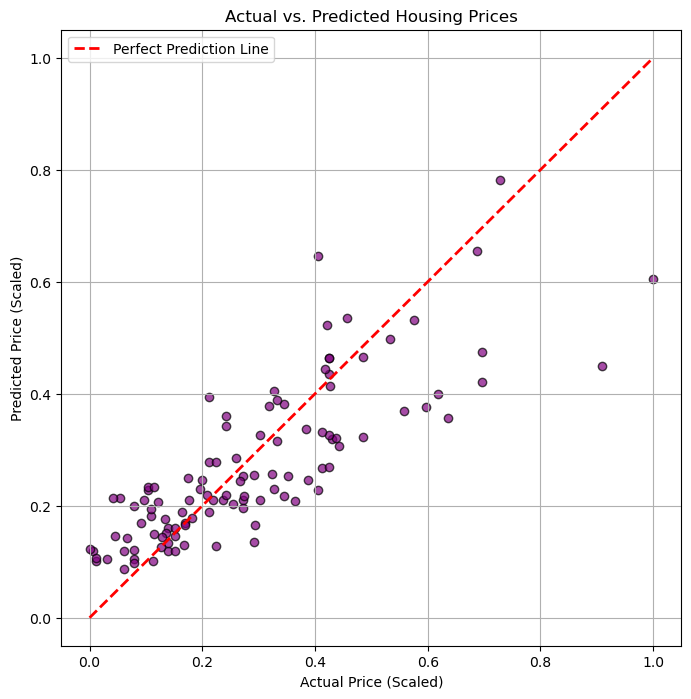

In [8]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test_r, y_pred_gbr, alpha=0.7, edgecolors='k', c='purple')
plt.plot([0, 1], [0, 1], '--', color='red', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Price (Scaled)')
plt.ylabel('Predicted Price (Scaled)')
plt.title('Actual vs. Predicted Housing Prices')
plt.legend()
plt.grid(True)
plt.show()

# Visualization 2 - Feature Importances

In [10]:
# Extract and plot feature importances to see which features the model values most.
feature_importances = pd.Series(gbr_tuned.feature_importances_, index=X_train_r.columns).sort_values(ascending=False)
feature_importances

area                0.453049
bathrooms           0.182770
airconditioning     0.099536
parking             0.049148
bedrooms            0.042607
stories             0.042502
basement            0.030449
furnishingstatus    0.029647
prefarea            0.025408
mainroad            0.016509
hotwaterheating     0.014584
guestroom           0.013793
dtype: float64

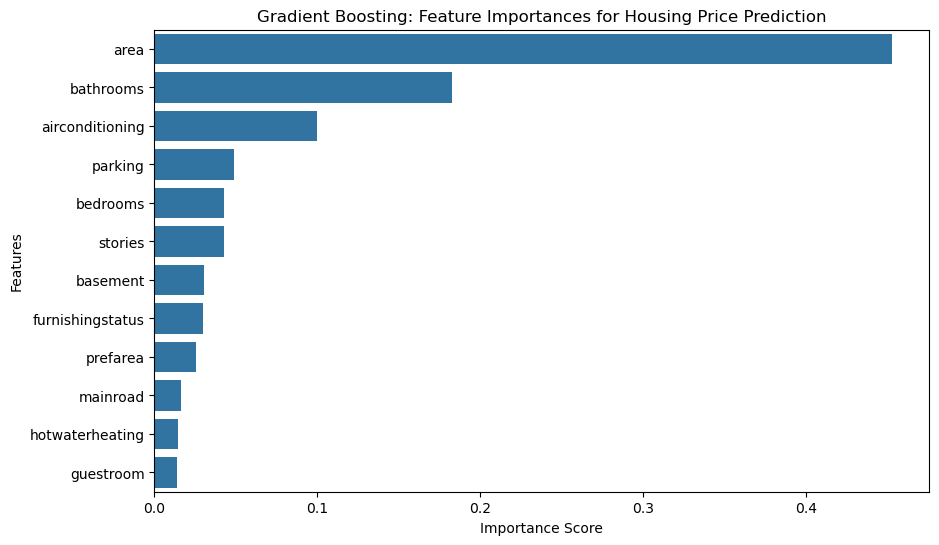

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Gradient Boosting: Feature Importances for Housing Price Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Visualization 3 - Residuals Plot

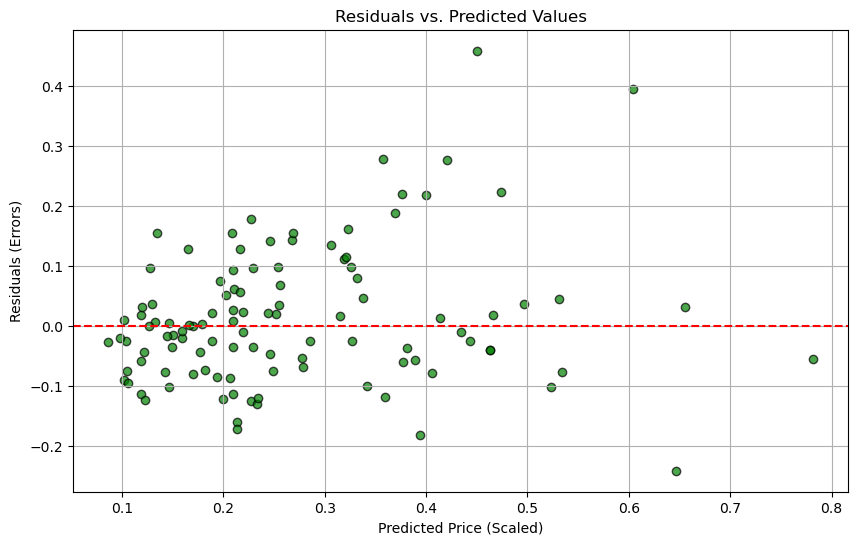

In [13]:
# Residuals are the errors (difference between actual and predicted values).
# A good model should have residuals randomly scattered around zero.
residuals = y_test_r - y_pred_gbr

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_gbr, residuals, alpha=0.7, edgecolors='k', c='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price (Scaled)')
plt.ylabel('Residuals (Errors)')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.show()